#Assignament 1
EXIST 2023 Task 1 - sexism detection

#Task 1 - Corpus


1.1 Download the data folder

In [3]:
from google.colab import drive
import os
try:
    drive.mount('/content/drive', force_remount=True)
except:
    os.makedirs('/content/drive/My Drive', exist_ok=True)

In [4]:
print(os.listdir("/content"))

['.config', 'drive', 'sample_data']


In [5]:
from tqdm import tqdm
import urllib.request
from pathlib import Path


In [6]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_url(download_path: Path, url: str):
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=download_path, reporthook=t.update_to)

In [7]:
print(f"Current work directory: {Path.cwd()}")
dataset_folder = Path.cwd().joinpath("Datasets")
print(f"Datasets folder: {dataset_folder}")

Current work directory: /content
Datasets folder: /content/Datasets


In [8]:
def download_dataset(download_path: Path, url: str):
  print("Downloading dataset...")
  download_url(url=url, download_path=download_path)
  print("Download complete!")

In [9]:
if not dataset_folder.exists():
  dataset_folder.mkdir(parents=True)

names = ["test.json", "training.json", "validation.json"]
url = "https://raw.githubusercontent.com/nlp-unibo/nlp-course-material/refs/heads/main/2024-2025/Assignment%201/data/"
for name in names:
  dataset_path = dataset_folder.joinpath(name)
  if not dataset_path.exists():
    download_dataset(dataset_path, url+name)



test.json: 500kB [00:00, 1.27MB/s]                            


Download complete!


training.json: 6.23MB [00:00, 9.54MB/s]                            


Download complete!


validation.json: 1.16MB [00:00, 3.07MB/s]                            

Download complete!


Inspect the datafile

In [10]:
import json

In [11]:
file_path = dataset_folder.joinpath("training.json")
with file_path.open() as json_file:
    data = json.load(json_file)
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['100001', '100002', '100003', '100004', '100005', '100006', '100007', '100008', '100009', '100010', '100011', '100012', '100013', '100014', '100015', '100016', '100017', '100018', '100019', '100020', '100021', '100022', '100023', '100024', '100025', '100026', '100027', '100028', '100029', '100030', '100031', '100032', '100033', '100034', '100035', '100036', '100037', '100038', '100039', '100040', '100041', '100042', '100043', '100044', '100045', '100046', '100047', '100048', '100049', '100050', '100051', '100052', '100053', '100054', '100055', '100056', '100057', '100058', '100059', '100060', '100061', '100062', '100063', '100064', '100065', '100066', '100067', '100068', '100069', '100070', '100071', '100072', '100073', '100074', '100075', '100076', '100077', '100078', '100079', '100080', '100081', '100082', '100083', '100084', '100085', '100086', '100087', '100088', '100089', '100090', '100091', '100092', '100093', '100094', '100095', '100096', '100097', '100

In [12]:
print(json.dumps(data['100001'], indent=4))

{
    "id_EXIST": "100001",
    "lang": "es",
    "tweet": "@TheChiflis Ignora al otro, es un capullo.El problema con este youtuber denuncia el acoso... cuando no afecta a la gente de izquierdas. Por ejemplo, en su video sobre el gamergate presenta como \"normal\" el acoso que reciben Fisher, Anita o Z\u00f6ey cuando hubo hasta amenazas de bomba.",
    "number_annotators": 6,
    "annotators": [
        "Annotator_1",
        "Annotator_2",
        "Annotator_3",
        "Annotator_4",
        "Annotator_5",
        "Annotator_6"
    ],
    "gender_annotators": [
        "F",
        "F",
        "F",
        "M",
        "M",
        "M"
    ],
    "age_annotators": [
        "18-22",
        "23-45",
        "46+",
        "46+",
        "23-45",
        "18-22"
    ],
    "labels_task1": [
        "YES",
        "YES",
        "NO",
        "YES",
        "YES",
        "YES"
    ],
    "labels_task2": [
        "REPORTED",
        "JUDGEMENTAL",
        "-",
        "REPORTED",
   

In [13]:
print(data['100001'].keys())


dict_keys(['id_EXIST', 'lang', 'tweet', 'number_annotators', 'annotators', 'gender_annotators', 'age_annotators', 'labels_task1', 'labels_task2', 'labels_task3', 'split'])


1.2 Encode the three JSON file as pandas dataframe

In [14]:
import pandas as pd

In [15]:
for name in names:
  dataset_path = dataset_folder.joinpath(name)
  with dataset_path.open() as json_file:
    data = json.load(json_file)
    name = name.replace(".json", "")
    print(f"Encoding {name}.json file into {name} DataFrame")
    locals()[name] = pd.DataFrame(data)

Encoding test.json file into test DataFrame
Encoding training.json file into training DataFrame
Encoding validation.json file into validation DataFrame


In [16]:
training = training.T
test = test.T
validation = validation.T
training.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES
100004,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES


In [17]:
print(f"training dataframe dimensions {training.shape}")
print(f"test dataframe dimensions {test.shape}")
print(f"validation dataframe dimensions {validation.shape}")


training dataframe dimensions (6920, 11)
test dataframe dimensions (312, 11)
validation dataframe dimensions (726, 11)


1.3 Generate hard labels for task 1 using majority voting and store them in a new dataframe column called hard_label_task1. Items without a clear majority will be removed from the dataset.

In [18]:
import numpy as np

In [19]:
def majority_scheme(el):
  votes = np.unique(el,return_counts=True)[1]
  if votes[0] > 3:
    return 'NO'
  elif votes[1] > 3:
    return 'YES'
  else:
    return np.nan

In [20]:
training['hard_label_task1'] = training['labels_task1'].apply(majority_scheme)
test['hard_label_task1'] = test['labels_task1'].apply(majority_scheme)
validation['hard_label_task1'] = validation['labels_task1'].apply(majority_scheme)


In [21]:
training.head()

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,labels_task1,labels_task2,labels_task3,split,hard_label_task1
100001,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...",6,"[Annotator_1, Annotator_2, Annotator_3, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, YES, NO, YES, YES, YES]","[REPORTED, JUDGEMENTAL, -, REPORTED, JUDGEMENT...","[[OBJECTIFICATION], [OBJECTIFICATION, SEXUAL-V...",TRAIN_ES,YES
100002,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, YES, NO]","[-, -, -, -, DIRECT, -]","[[-], [-], [-], [-], [OBJECTIFICATION], [-]]",TRAIN_ES,NO
100003,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...",6,"[Annotator_7, Annotator_8, Annotator_9, Annota...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, NO, NO, NO, NO]","[-, -, -, -, -, -]","[[-], [-], [-], [-], [-], [-]]",TRAIN_ES,NO
100004,100004,es,@Lunariita7 Un retraso social bastante lamenta...,6,"[Annotator_13, Annotator_14, Annotator_15, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[NO, NO, YES, NO, YES, YES]","[-, -, DIRECT, -, REPORTED, REPORTED]","[[-], [-], [IDEOLOGICAL-INEQUALITY], [-], [IDE...",TRAIN_ES,NaN
100005,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,6,"[Annotator_19, Annotator_20, Annotator_21, Ann...","[F, F, F, M, M, M]","[18-22, 23-45, 46+, 46+, 23-45, 18-22]","[YES, NO, YES, NO, YES, YES]","[REPORTED, -, JUDGEMENTAL, -, JUDGEMENTAL, DIR...","[[STEREOTYPING-DOMINANCE, OBJECTIFICATION], [-...",TRAIN_ES,YES


Remove items without a clear majority

In [22]:
training = training.dropna(axis=0)
test = test.dropna(axis=0)
validation = validation.dropna(axis=0)

1.4 Filter the DataFrame to keep only rows where the lang column is 'en'

In [23]:
training = training[training['lang'] == 'en']
test = test[test['lang'] == 'en']
validation = validation[validation['lang'] == 'en']


Remove unwanted columns: Keep only id_EXIST, lang, tweet, and hard_label_task1

In [24]:
labels_to_keep = ['id_EXIST', 'lang', 'tweet', 'hard_label_task1']
labels_to_remove = [label for label in list(training.columns) if label not in labels_to_keep]

training = training.drop(labels_to_remove, axis = 1).reset_index(drop=True)
test = test.drop(labels_to_remove, axis = 1).reset_index(drop=True)
validation = validation.drop(labels_to_remove, axis = 1).reset_index(drop=True)


In [25]:
training.head()

,id_EXIST,lang,tweet,hard_label_task1
0,200002,en,Writing a uni essay in my local pub with a cof...,YES
1,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,YES
2,200006,en,According to a customer I have plenty of time ...,NO
3,200007,en,"So only 'blokes' drink beer? Sorry, but if you...",NO
4,200008,en,New to the shelves this week - looking forward...,NO


1.6 Encode the hard_label_task1 column: Use 1 to represent "YES" and 0 to represent "NO".

In [26]:
def binary_enc(el):
  if el == 'YES':
    return 1
  else:
    return 0

In [27]:
training['hard_label_task1'] = training['hard_label_task1'].apply(binary_enc)
test['hard_label_task1'] = test['hard_label_task1'].apply(binary_enc)
validation['hard_label_task1'] = validation['hard_label_task1'].apply(binary_enc)

In [28]:
training.head()

,id_EXIST,lang,tweet,hard_label_task1
0,200002,en,Writing a uni essay in my local pub with a cof...,1
1,200003,en,@UniversalORL it is 2021 not 1921. I dont appr...,1
2,200006,en,According to a customer I have plenty of time ...,0
3,200007,en,"So only 'blokes' drink beer? Sorry, but if you...",0
4,200008,en,New to the shelves this week - looking forward...,0


#Task2 - Data Cleaning

In [29]:
print(training['tweet'][0][-1])

🙃


remove emoji

In [30]:
!pip install emoji
import emoji
def remove_emojis(text):
  return emoji.replace_emoji(text, replace='')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 27.4 MB/s eta 0:00:00


remove hashtags, mentions, URLs, special characters and symbols and specific quote characters (e.g., curly quotes)..

In [31]:
import re

def cleaner(text):
  """
  remove pattern like #example: any patter that begin with # and is followed by any alphanumeric characters or _
  the single '#' followed by space is not removed
  the same for @
  """
  clean_text = re.sub(r'#[\w-]+\b|@[\w-]+|https?://(?:www\.)?[^\s/$.?#].[^\s]*|[!@#$%^&*()_+={}\[\]|\\:;<>,.?/~`-]|[\'"‘’“”«»„]', '', text)
  return re.sub(r'\s+', ' ', clean_text).strip()



In [32]:
training['tweet'] = training['tweet'].apply(cleaner)
test['tweet'] = test['tweet'].apply(cleaner)
validation['tweet'] = validation['tweet'].apply(cleaner)

training['tweet'] = training['tweet'].apply(remove_emojis)
test['tweet'] = test['tweet'].apply(remove_emojis)
validation['tweet'] = validation['tweet'].apply(remove_emojis)

In [33]:
training.head()

,id_EXIST,lang,tweet,hard_label_task1
0,200002,en,Writing a uni essay in my local pub with a cof...,1
1,200003,en,it is 2021 not 1921 I dont appreciate that on ...,1
2,200006,en,According to a customer I have plenty of time ...,0
3,200007,en,So only blokes drink beer Sorry but if you are...,0
4,200008,en,New to the shelves this week looking forward t...,0


Visualize the distribution of the two classes inside each datasets

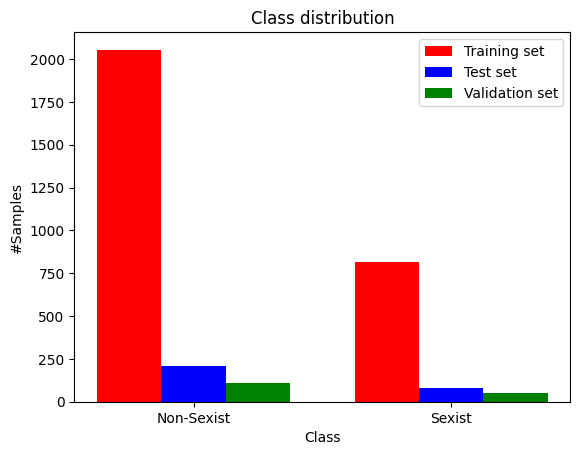

In [34]:
import matplotlib.pyplot as plt

training_labels = [np.unique(training['hard_label_task1'], return_counts=True)[1][0], np.unique(training['hard_label_task1'], return_counts=True)[1][1]]
test_labels = [np.unique(test['hard_label_task1'], return_counts=True)[1][0], np.unique(test['hard_label_task1'], return_counts=True)[1][1]]
validation_labels = [np.unique(validation['hard_label_task1'], return_counts=True)[1][0], np.unique(validation['hard_label_task1'], return_counts=True)[1][1]]

bar_width = 0.25
x = np.arange(2)


plt.bar(x, training_labels, width=bar_width, label='Training set', color='red')
plt.bar(x + bar_width, test_labels, width=bar_width, label='Test set', color='blue')
plt.bar(x + 2 * bar_width, validation_labels, width=bar_width, label='Validation set', color='green')


plt.xlabel('Class')
plt.ylabel('#Samples')
plt.title('Class distribution')
plt.xticks(x + bar_width, ['Non-Sexist', 'Sexist'])
plt.legend()
plt.show()

Have a look on text length distribution.

In [35]:
import nltk
from nltk.tokenize import word_tokenize

# necessary for being able to tokenize
nltk.download('punkt_tab')
nltk.download('punkt')

train_texts = training.tweet.values
test_texts = test.tweet.values
validation_texts = validation.tweet.values

train_lengths = [len(word_tokenize(text)) for text in tqdm(train_texts)]
test_lengths = [len(word_tokenize(text)) for text in tqdm(test_texts)]
validation_lenghts = [len(word_tokenize(text)) for text in tqdm(validation_texts)]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
100%|██████████| 158/158 [00:00<00:00, 1588.40it/s]


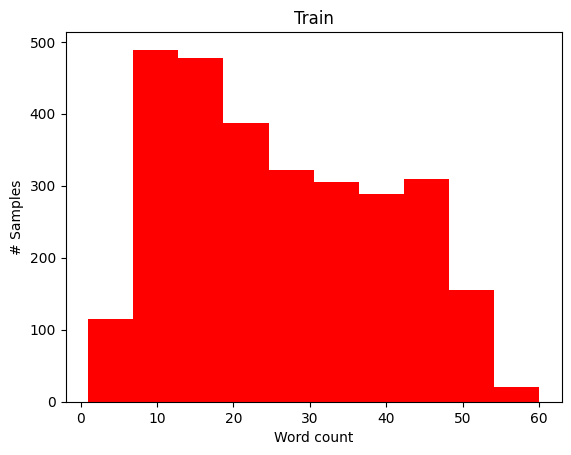

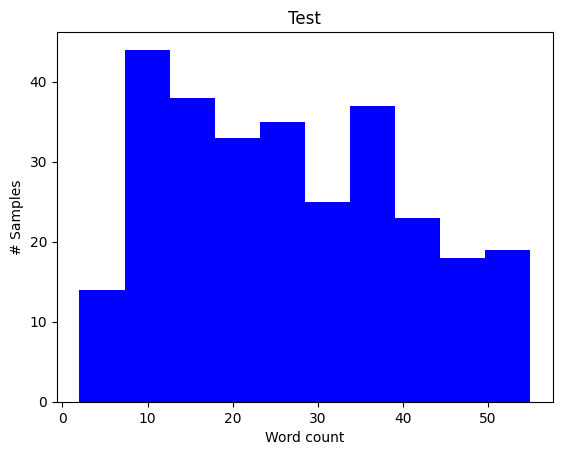

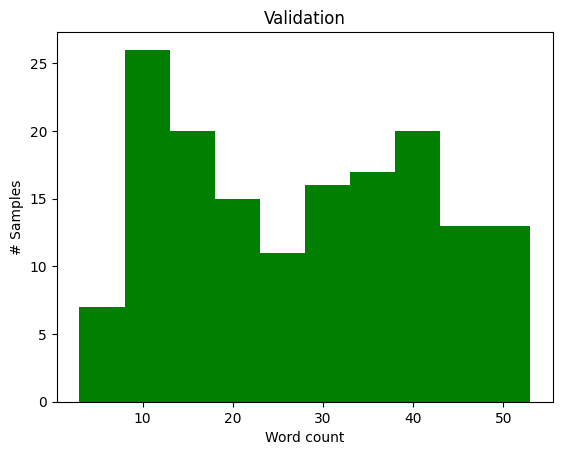

In [36]:
plot1 = plt.figure(1)
plt.hist(train_lengths, color="red")
plt.xlabel('Word count')
plt.ylabel('# Samples')
plt.title("Train")

plot2 = plt.figure(2)
plt.hist(test_lengths, color="blue")
plt.xlabel('Word count')
plt.ylabel('# Samples')
plt.title("Test")

plot3 = plt.figure(3)
plt.hist(validation_lenghts, color="green")
plt.xlabel('Word count')
plt.ylabel('# Samples')
plt.title("Validation")

plt.show()

Perform lemmatiziation.

WordNetLemmatizer from nltk perform lemmatizationon each token based on its POS tag. It relies on WordNet to find base forms of words (lemmas).

In oreder to perform lemmatization, we need:

-tokenize text

-tagging

-lemmatize


In [37]:
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

#the following resources are needed for tagging and lemmatization.
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


This function is needed beacuse nltk WordNetLemmatizer accept the following option for POS tags : “n” for nouns, “v” for verbs, “a” for adjectives, “r” for adverbs and “s” for satellite adjectives.

In [38]:
def get_wordnet_key(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [39]:
def lem_text(text: str):
    tokens = tokenizer.tokenize(text)                                                  #tokenize
    tagged = pos_tag(tokens)                                                           #tags
    words = [lemmatizer.lemmatize(word.lower(), get_wordnet_key(tag)) for word, tag in tagged] #lemmatize
    return " ".join(words)

Apply lemmatization to training, test and validation sets.

In [40]:
lem_train_texts = [lem_text(text) for text in tqdm(train_texts, leave=True, position=0)]
lem_test_texts = [lem_text(text) for text in tqdm(test_texts, leave=True, position=0)]
lem_validation_texts = [lem_text(text) for text in tqdm(validation_texts, leave=True, position=0)]

100%|██████████| 158/158 [00:01<00:00, 144.61it/s]


In [41]:
print("Before lemmatization :")
print(train_texts[0])
print("")
print("After lemmatization :")
print(lem_train_texts[0])

Before lemmatization :
Writing a uni essay in my local pub with a coffee Random old man keeps asking me drunk questions when Im trying to concentrate amp ends with good luck but youll just end up getting married and not use it anyway is alive and well 

After lemmatization :
write a uni essay in my local pub with a coffee random old man keep ask me drunk question when im try to concentrate amp end with good luck but youll just end up get married and not use it anyway be alive and well


max length over all the tweets

In [42]:
tweet_length = [len(tokenizer.tokenize(tweet)) for tweet in lem_train_texts]

In [43]:
max_tweet_length = max(tweet_length)

#Task3 - Text Encoding

Download GloVe embeddings

In [44]:
import gensim
import gensim.downloader as gloader

embedding_dimension = 100
download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
emb_model = gloader.load(download_path)

[==================================================] 100.0% 128.1/128.1MB downloaded


Use whitespace tokenizer to get the training tokens to encode

In [45]:
training_corpus = ' '.join(lem_train_texts)
tokens_training_corpus = tokenizer.tokenize(training_corpus)


build the vocabulary with all the tokens in the training corpus

In [46]:
from collections import OrderedDict
def build_vocabulary(tokens_training_corpus):
    """
    Given a dataset, builds the corresponding word vocabulary.

    :param df: dataset from which we want to build the word vocabulary (pandas.DataFrame)
    :return:
      - word vocabulary: vocabulary index to word
      - inverse word vocabulary: word to vocabulary index
      - word listing: set of unique terms that build up the vocabulary
    """
    idx_to_word = OrderedDict()
    word_to_idx = OrderedDict()

    word_to_idx['__PAD__'] = 0
    idx_to_word[0] = '__PAD__'
    curr_idx = 1
    for token in tqdm(tokens_training_corpus):
        if token not in word_to_idx:
            word_to_idx[token] = curr_idx
            idx_to_word[curr_idx] = token
            curr_idx += 1

    word_listing = list(idx_to_word.values())
    return idx_to_word, word_to_idx, word_listing

In [47]:
idx_to_word, word_to_idx, word_listing = build_vocabulary(tokens_training_corpus)
print(len(idx_to_word), len(word_to_idx), len(word_listing))
print(type(idx_to_word))

100%|██████████| 74416/74416 [00:00<00:00, 1532570.59it/s]

10015 10015 10015
<class 'collections.OrderedDict'>


check the out of vocabulary tokens: tokens in the training corpus not present in the pre-trained embedding model

In [48]:
def check_OOV_terms(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                    word_listing: list[str]):
    """
    Checks differences between pre-trained embedding model vocabulary
    and dataset specific vocabulary in order to highlight out-of-vocabulary terms.

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_listing: dataset specific vocabulary (list)

    :return
        - list of OOV terms
    """
    embedding_vocabulary = set(embedding_model.key_to_index.keys())
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

In [49]:
oov_terms = check_OOV_terms(emb_model, word_listing)
oov_percentage = float(len(oov_terms)) * 100 / len(word_listing)
print(f"Total OOV terms: {len(oov_terms)} ({oov_percentage:.2f}%)")

Total OOV terms: 1981 (19.78%)


Add to the vocuabulary the glove word not present in the training corpus

In [50]:
def expand_vocabulary(idx_to_word, word_to_idx, word_listing, emb_model):

  curr_idx = len(idx_to_word)
  embedding_vocabulary = set(emb_model.key_to_index.keys())
  tokens_to_add = list(set(embedding_vocabulary).difference(word_listing))
  for token in tokens_to_add:
    word_to_idx[token] = curr_idx
    idx_to_word[curr_idx] = token
    curr_idx += 1
  word_to_idx['UNK'] = curr_idx
  idx_to_word[curr_idx] = 'UNK'


In [51]:
expand_vocabulary(idx_to_word, word_to_idx, word_listing, emb_model)
print(len(idx_to_word))


401982


In [52]:
vocab_size = len(idx_to_word)

Build the embedding matrix

In [53]:
def build_embedding_matrix(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                           embedding_dimension: int,
                           word_to_idx: dict[str, int],
                           vocab_size: int):
    """
    Builds the embedding matrix of a specific dataset given a pre-trained word embedding model

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_to_idx: vocabulary map (word -> index) (dict)
    :param vocab_size: size of the vocabulary
    :param oov_terms: list of OOV terms (list)

    :return
        - embedding matrix that assigns a high dimensional vector to each word in the dataset specific vocabulary (shape |V| x d)
    """
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)
    for word, idx in tqdm(word_to_idx.items()):
        try:
            embedding_vector = embedding_model[word]
        except (KeyError, TypeError):
            embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)

        embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [54]:
embedding_matrix = build_embedding_matrix(emb_model, embedding_dimension, word_to_idx, vocab_size=len(idx_to_word))
print(embedding_matrix.shape)

100%|██████████| 401982/401982 [00:01<00:00, 250123.79it/s]

(401982, 100)


#Task4 - Model Definition

Some utilities

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

In [56]:
def create_baseline_model(embedding_matrix, vocab_size, embedding_dimension, units, dropout):
  embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                      output_dim=embedding_dimension,
                                      weights=[embedding_matrix],
                                      mask_zero=True,                   # automatically masks padding tokens
                                      name='encoder_embedding',
                                      trainable=True )
  baseline_model = Sequential([embedding, Bidirectional(LSTM(units = units, dropout = dropout)), Dense(1, activation='sigmoid')])
  baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return baseline_model

In [57]:
def create_model1(embedding_matrix, vocab_size, embedding_dimension, units, units2, dropout):
  embedding = tf.keras.layers.Embedding(input_dim=vocab_size,
                                      output_dim=embedding_dimension,
                                      weights=[embedding_matrix],
                                      mask_zero=True,                   # automatically masks padding tokens
                                      name='encoder_embedding',
                                      trainable=True )
  model1 = Sequential([embedding, Bidirectional(LSTM(units = units, dropout = dropout, return_sequences=True)), LSTM(units = units2, dropout=dropout), Dense(1, activation='sigmoid')])
  model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model1

In [58]:
from tensorflow.keras.utils import plot_model
def plot_models(baseline_model, model1):
  plot_model(baseline_model, to_file='/content/drive/My Drive/baseline_model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)
  plot_model(model1, to_file='/content/drive/My Drive/model1.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)


In [59]:
def build_baseline_model_wrapper(embedding_matrix, vocab_size, embedding_dimension):
    def build_baseline_model(hp):
        units = hp.Int('units', min_value=16, max_value=128, step=16)
        dropout = hp.Float("dropout", min_value=0, max_value=0.2, step=0.05)

        model = create_baseline_model(embedding_matrix, vocab_size, embedding_dimension, units, dropout)
        return model
    return build_baseline_model


In [60]:
def build_model1_wrapper(embedding_matrix, vocab_size, embedding_dimension):
  def build_model1(hp):
    units = hp.Int('units', min_value=16, max_value=128, step=16)
    units2 = hp.Int('units2', min_value=16, max_value=128, step=16)
    dropout = hp.Float("dropout", min_value=0, max_value=0.2, step=0.05)

    model = create_model1(embedding_matrix, vocab_size, embedding_dimension, units, units2, dropout)

    return model
  return build_model1

In [61]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.0 MB/s eta 0:00:00


In [62]:
from keras_tuner import RandomSearch
def hyperparameter_tuning_baseline(Xtrain, ytrain, seed, embedding_matrix, vocab_size, embedding_dimension):
  build_model_fn = build_baseline_model_wrapper(embedding_matrix, vocab_size, embedding_dimension)

  tuner = RandomSearch(
    hypermodel=build_model_fn,
    objective='accuracy',
    max_trials=10,
    seed=seed,
    directory = "/content/drive/My Drive",
    project_name = "baseline_tuned")
  tuner.search(Xtrain, ytrain, epochs=10, validation_split=0.2)
  best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
  return tuner, best_hps

In [63]:
from keras_tuner import RandomSearch
def hyperparameter_tuning_model1(Xtrain, ytrain, seed, embedding_matrix, vocab_size, embedding_dimension):
  build_model_fn = build_model1_wrapper(embedding_matrix, vocab_size, embedding_dimension)
  tuner = RandomSearch(
    hypermodel=build_model_fn,
    objective='accuracy',
    max_trials=10,
    seed=seed,
    directory = "/content/drive/My Drive",
    project_name = "model1_tuned")
  tuner.search(Xtrain, ytrain, epochs=10, validation_split=0.2)
  best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
  return tuner, best_hps

#Task5 - Training and Evaluation

prepare the three sets (tweets represented as sequences of embeddings, for validation and test set for OOV use UNK token's embedding)

In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_training_val_test(lem_texts, tokenizer, word_to_idx, hard_label):
  tweets = [tokenizer.tokenize(tweet) for tweet in lem_texts]
  tweets_mapped = [[word_to_idx.get(token, word_to_idx['UNK']) for token in seq] for seq in tweets]
  X = pad_sequences(tweets_mapped, maxlen = max_tweet_length, padding='post')
  y = hard_label
  return X , y


In [65]:
Xtrain, ytrain = get_training_val_test(lem_train_texts, tokenizer, word_to_idx, training.hard_label_task1)
Xval, yval = get_training_val_test(lem_validation_texts, tokenizer, word_to_idx, validation.hard_label_task1)
Xtest, ytest = get_training_val_test(lem_test_texts, tokenizer, word_to_idx, test.hard_label_task1)


Tune the hyperparameters

In [66]:
import random
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model
seed = 17
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

#BASELINE
tuner, best_hps = hyperparameter_tuning_baseline(Xtrain, ytrain, seed, embedding_matrix, vocab_size, embedding_dimension)
best_baseline = tuner.hypermodel.build(best_hps)
print(best_hps.values.items())


#MODEL1

tuner, best_hps = hyperparameter_tuning_model1(Xtrain, ytrain, seed, embedding_matrix, vocab_size, embedding_dimension)
best_model1 = tuner.hypermodel.build(best_hps)
print(best_hps.values.items())




Trial 10 Complete [00h 01m 19s]
accuracy: 0.9699477553367615

Best accuracy So Far: 0.9969512224197388
Total elapsed time: 00h 12m 29s
dict_items([('units', 96), ('units2', 96), ('dropout', 0.0)])


Train the best models on the training set using at least three seeds

In [67]:

seeds = [17,42,123]


baseline_eval = []
baseline_f1macro = []
model1_eval = []
model1_f1macro = []
for seed in seeds:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

  #Train Baseline
  history_baseline = best_baseline.fit(Xtrain, ytrain, validation_split=0.2, epochs=10)
  #baseline_model = load_model("/content/drive/My Drive/baseline_model.keras")
  baseline_result = best_baseline.evaluate(Xval, yval)
  baseline_eval.append(baseline_result)

  y_pred_baseline = (best_baseline.predict(Xval) > 0.5).astype(int)
  baseline_f1macro.append(f1_score(yval, y_pred_baseline, average = 'macro'))


  # Train Model 1
  history_model1 = best_model1.fit(Xtrain, ytrain, validation_split=0.2, epochs=10)
  #model1 = load_model("/content/drive/My Drive/model1.keras")
  model1_result = best_model1.evaluate(Xval, yval)
  model1_eval.append(model1_result)

  y_pred_model1 = (best_model1.predict(Xval) > 0.5).astype(int)
  model1_f1macro.append(f1_score(yval, y_pred_model1, average = 'macro'))



Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.7094 - loss: 0.5940 - val_accuracy: 0.6481 - val_loss: 0.6690
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7364 - loss: 0.5456 - val_accuracy: 0.6516 - val_loss: 0.6621
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7704 - loss: 0.4847 - val_accuracy: 0.6533 - val_loss: 0.6655
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.8326 - loss: 0.3889 - val_accuracy: 0.6551 - val_loss: 0.6892
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8995 - loss: 0.2510 - val_accuracy: 0.6341 - val_loss: 0.9029
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9591 - loss: 0.1336 - val_accuracy: 0.6411 - val_loss: 1.4742
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9628 - loss: 0.1068 - val_accuracy: 0.6481 - val_loss: 1.5819
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9711 - loss: 0.0933 - val_accuracy: 0.6394 - v

Save the models (only the last seed)

In [68]:
best_baseline.save("/content/drive/My Drive/baseline_model.keras")
best_model1.save("/content/drive/My Drive/model1.keras")


In [69]:
baseline_eval

[[0.7900727391242981, 0.7341772317886353],
 [1.1534390449523926, 0.7721518874168396],
 [1.3031400442123413, 0.7658227682113647]]

In [70]:
import statistics
baseline_f1macro_mean = statistics.mean(baseline_f1macro)
model1_f1macro_mean = statistics.mean(model1_f1macro)
baseline_f1macro_stdev = statistics.stdev(baseline_f1macro)
model1_f1macro_stdev = statistics.stdev(model1_f1macro)

baseline_acc = [item[1] for item in baseline_eval]
baseline_acc_mean = statistics.mean(baseline_acc)
baseline_acc_stdev = statistics.stdev(baseline_acc)

model1_acc = [item[1] for item in model1_eval]
model1_acc_mean = statistics.mean(model1_acc)
model1_acc_stdev = statistics.stdev(model1_acc)

print("   Baseline Model   ")
print("--------------------")
print("f1_scores")
print("         mean  : ", baseline_f1macro_mean )
print("         stdev : ", baseline_f1macro_stdev )
print("accuracy")
print("         mean  : ", baseline_acc_mean )
print("         stdev : ", baseline_acc_stdev )
print("")


print("")
print("====================")
print("")
print("       Model1       ")
print("--------------------")
print("f1_scores")
print("         mean  : ", model1_f1macro_mean )
print("         stdev : ", model1_f1macro_stdev )
print("accuracy")
print("         mean  : ", model1_acc_mean )
print("         stdev : ", model1_acc_stdev )


   Baseline Model   
--------------------
f1_scores
         mean  :  0.693192467243076
         stdev :  0.016853371605409454
accuracy
         mean  :  0.7573839624722799
         stdev :  0.020345237753506027



       Model1       
--------------------
f1_scores
         mean  :  0.6184012619791227
         stdev :  0.023819988677651005
accuracy
         mean  :  0.700421949227651
         stdev :  0.02557880370051248


the following refers to the last seed


In [71]:
plot_models(best_baseline, best_model1)

In [72]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


#Task6 - Transformer

In [73]:
from datasets import Dataset

train_data = Dataset.from_pandas(training)
validation_data = Dataset.from_pandas(validation)
test_data = Dataset.from_pandas(test)

In [74]:
train_data

Dataset({
    features: ['id_EXIST', 'lang', 'tweet', 'hard_label_task1'],
    num_rows: 2870
})

1. Load the tokenizer and the model

In [75]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig

MODEL = "cardiffnlp/twitter-roberta-base-hate"

#MODEL = "/content/drive/My Drive/transormer_model"
tokenizer = AutoTokenizer.from_pretrained(MODEL) #Instantiate one of the tokenizer classes of the library from a pretrained model vocabulary.
model = AutoModelForSequenceClassification.from_pretrained(MODEL, num_labels=2,
                                                           id2label={0: 'NEG', 1: 'POS'},
                                                           label2id={'NEG': 0, 'POS': 1})
#This is a generic model class that will be instantiated as one of the model classes of the library (with a sequence classification head) when created with the from_pretrained() class method

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

2. Preprocess the Dataset: You will need to preprocess your dataset to prepare it for input into the model. Tokenize your text data using the appropriate tokenizer and ensure it is formatted correctly.

In [76]:
def lowercase_tweets(example):
    example["tweet"] = example["tweet"].lower()
    return example


train_data = train_data.map(lowercase_tweets)
test_data = test_data.map(lowercase_tweets)
validation_data = validation_data.map(lowercase_tweets)

Map:   0%|          | 0/2870 [00:00<?, ? examples/s]

Map:   0%|          | 0/286 [00:00<?, ? examples/s]

Map:   0%|          | 0/158 [00:00<?, ? examples/s]

In [77]:
def preprocess_text(texts):
    return tokenizer(texts['tweet'], truncation=True)

In [78]:
train_data = train_data.map(preprocess_text, batched=True)
test_data = test_data.map(preprocess_text, batched=True)
validation_data = validation_data.map(preprocess_text, batched=True)

Map:   0%|          | 0/2870 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/286 [00:00<?, ? examples/s]

Map:   0%|          | 0/158 [00:00<?, ? examples/s]

In [79]:
print(model)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [80]:
model_architecture = model.base_model

Sanity check

In [81]:
train_data

Dataset({
    features: ['id_EXIST', 'lang', 'tweet', 'hard_label_task1', 'input_ids', 'attention_mask'],
    num_rows: 2870
})

In [82]:
original_text = train_data['tweet'][0]
decoded_text = tokenizer.decode(train_data['input_ids'][0])

print(original_text)
print()
print()
print(decoded_text)

writing a uni essay in my local pub with a coffee random old man keeps asking me drunk questions when im trying to concentrate amp ends with good luck but youll just end up getting married and not use it anyway is alive and well 


<s>writing a uni essay in my local pub with a coffee random old man keeps asking me drunk questions when im trying to concentrate amp ends with good luck but youll just end up getting married and not use it anyway is alive and well </s>


3. Train the Model: Use the Trainer to train the model on your training data.

In [83]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [84]:
train_data = train_data.rename_column('hard_label_task1', 'label')
validation_data = validation_data.rename_column('hard_label_task1', 'label')
test_data = test_data.rename_column('hard_label_task1', 'label')

In [85]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="test_dir",                 # where to save model
    learning_rate=2e-5,
    per_device_train_batch_size=8,         # accelerate defines distributed training
    per_device_eval_batch_size=8,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",           # when to report evaluation metrics/losses
    save_strategy="epoch",                 # when to save checkpoint
    load_best_model_at_end=True,
    report_to='none'                       # disabling wandb (default)
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [86]:
from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(output_info):
    predictions, labels = output_info
    predictions = np.argmax(predictions, axis=-1)

    f1 = f1_score(y_pred=predictions, y_true=labels, average='macro')
    acc = accuracy_score(y_pred=predictions, y_true=labels)
    return {'f1': f1, 'acc': acc}

In [87]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=validation_data,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

<ipython-input-87-4da441d44a8b>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [88]:
trainer.train()


Epoch,Training Loss,Validation Loss,F1,Acc
1,No log,0.485144,0.760606,0.797468


TrainOutput(global_step=359, training_loss=0.5023774808495822, metrics={'train_runtime': 72.949, 'train_samples_per_second': 39.343, 'train_steps_per_second': 4.921, 'total_flos': 81027927275280.0, 'train_loss': 0.5023774808495822, 'epoch': 1.0})

Save the model

In [89]:
output_dir_transformer = "/content/drive/My Drive/transormer_model"
trainer.save_model(output_dir_transformer)

4. Evaluate the Model on the Test Set using F1-macro.

In [90]:
test_prediction_info = trainer.predict(test_data)
test_predictions, test_labels = test_prediction_info.predictions, test_prediction_info.label_ids

print(test_predictions.shape)
print(test_labels.shape)

(286, 2)
(286,)


In [91]:
test_metrics = compute_metrics([test_predictions, test_labels])
print(test_metrics)

{'f1': 0.6574459590486511, 'acc': 0.7062937062937062}


#Task7 - Error Analysis

In [92]:
from sklearn.metrics import classification_report
def compute_error_analysis(y_baseline, y_model1, y_transformer, y_true):
  print("Baseline Model")
  print(classification_report(y_true, y_baseline))
  print("Model1")
  print(classification_report(y_true, y_model1))
  print("Transformer")
  print(classification_report(y_true, y_transformer))

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def make_confusion_matrices(y_true, y_baseline, y_model1, y_transformer):
  cm_baseline = confusion_matrix(y_true, y_baseline)
  cm_model1 = confusion_matrix(y_true, y_model1)
  cm_transformer = confusion_matrix(y_true, y_transformer)

  fig, axes = plt.subplots(1, 3, figsize=(15, 5))
  disp_baseline = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=['NEG', 'POS'])
  disp_baseline.plot(ax=axes[0], cmap='Blues')
  axes[0].set_title('Baseline Model')
  disp_model1 = ConfusionMatrixDisplay(confusion_matrix=cm_model1, display_labels=['NEG', 'POS'])
  disp_model1.plot(ax=axes[1], cmap='Blues')
  axes[1].set_title('Model 1')
  disp_transformer = ConfusionMatrixDisplay(confusion_matrix=cm_transformer, display_labels=['NEG', 'POS'])
  disp_transformer.plot(ax=axes[2], cmap='Blues')
  axes[2].set_title('Transformer Model')
  plt.show()


In [94]:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall(y_true, y_baseline, y_model1, y_transformer):

    precision_baseline, recall_baseline, _ = precision_recall_curve(y_true, y_baseline)
    auc_baseline = auc(recall_baseline, precision_baseline)

    precision_model1, recall_model1, _ = precision_recall_curve(y_true, y_model1)
    auc_model1 = auc(recall_model1, precision_model1)

    precision_transformer, recall_transformer, _ = precision_recall_curve(y_true, y_transformer)
    auc_transformer = auc(recall_transformer, precision_transformer)

    plt.figure(figsize=(10, 6))
    plt.plot(recall_baseline, precision_baseline, label=f'Baseline (AUC = {auc_baseline:.2f})', linestyle='--')
    plt.plot(recall_model1, precision_model1, label=f'Model1 (AUC = {auc_model1:.2f})')
    plt.plot(recall_transformer, precision_transformer, label=f'Transformer (AUC = {auc_transformer:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve Comparison')
    plt.legend(loc='best')
    plt.grid(alpha=0.5)
    plt.show()


In [95]:
test_data[1]['id_EXIST']

'400179'

In [96]:
def compare_errors(y_true, y_baseline, y_model1, y_transformer, test_data):

  bilstm_fail_only_indices = [i for i in range(len(y_true)) if y_true[i] != y_baseline[i] and y_true[i] != y_model1[i] and y_true[i] == y_transformer[i]]
  only_trasformer_fail_indices = [i for i in range(len(y_true)) if y_true[i] != y_transformer[i] and y_true[i] == y_baseline[i] and y_true[i] == y_model1[i]]

    # cambiare vogliamo solo id_EXISTsa
  bilstm_fail_only_samples = [test_data[i]['id_EXIST'] for i in bilstm_fail_only_indices]
  only_trasformer_fail_samples = [test_data[i]['id_EXIST'] for i in only_trasformer_fail_indices]

  return bilstm_fail_only_samples, only_trasformer_fail_samples


In [97]:
y_pred_baseline = (best_baseline.predict(Xtest) > 0.5).astype(int)
y_pred_model1 = (best_model1.predict(Xtest) > 0.5).astype(int)
y_pred_transformer = np.argmax(test_predictions, axis=-1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [98]:
compute_error_analysis(y_pred_baseline, y_pred_model1, y_pred_transformer, ytest)

Baseline Model
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       206
           1       0.32      0.34      0.33        80

    accuracy                           0.62       286
   macro avg       0.53      0.53      0.53       286
weighted avg       0.62      0.62      0.62       286

Model1
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       206
           1       0.39      0.42      0.40        80

    accuracy                           0.65       286
   macro avg       0.58      0.58      0.58       286
weighted avg       0.66      0.65      0.66       286

Transformer
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       206
           1       0.48      0.59      0.53        80

    accuracy                           0.71       286
   macro avg       0.65      0.67      0.66       286
weighted avg       0.73      0.71      0

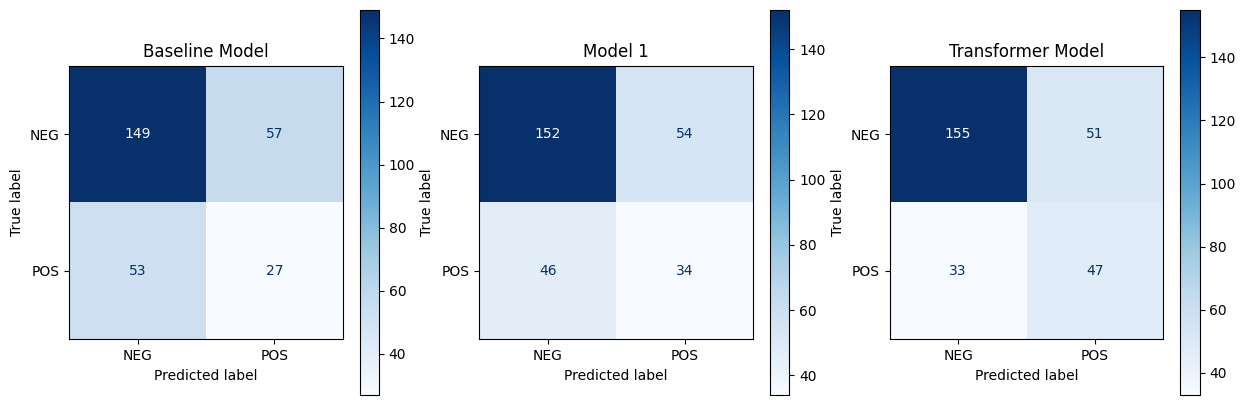

In [99]:
make_confusion_matrices(ytest, y_pred_baseline, y_pred_model1, y_pred_transformer)

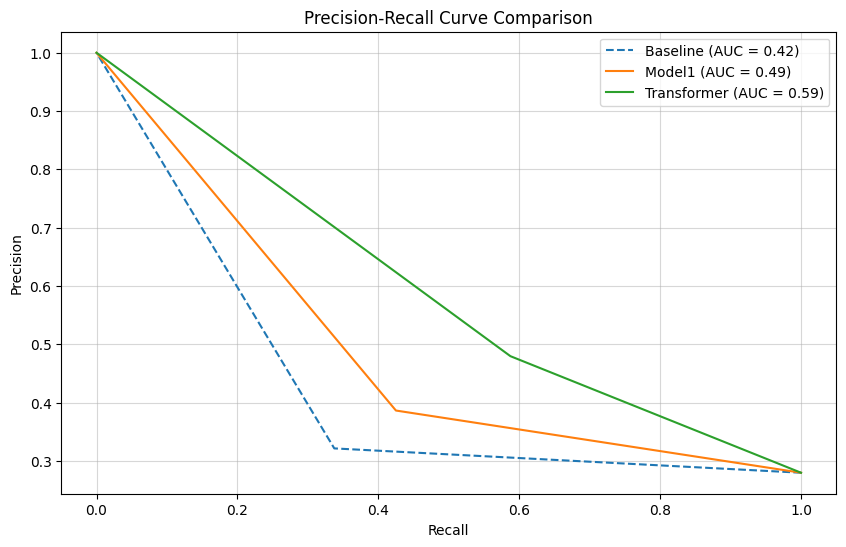

In [100]:
plot_precision_recall(ytest, y_pred_baseline, y_pred_model1, y_pred_transformer)

In [101]:
bilstm_fail_only_samples, only_trasformer_fail_samples = compare_errors(ytest, y_pred_baseline, y_pred_model1, y_pred_transformer, test_data)
print(len(bilstm_fail_only_samples))
print(len(only_trasformer_fail_samples))

41
26


In [102]:
only_trasformer_fail_samples

['400189',
 '400199',
 '400201',
 '400202',
 '400242',
 '400246',
 '400270',
 '400272',
 '400287',
 '400292',
 '400296',
 '400343',
 '400360',
 '400374',
 '400381',
 '400384',
 '400393',
 '400429',
 '400437',
 '400446',
 '400449',
 '400468',
 '400478',
 '400483',
 '400485',
 '400488']

In [103]:
example_transformer = test_data.filter(lambda example: example['id_EXIST'] == only_trasformer_fail_samples[1])[0]['tweet']

example_transformer = {'id_EXIST' : int(only_trasformer_fail_samples[1]), 'tweet' : test_data.filter(lambda example: example['id_EXIST'] == only_trasformer_fail_samples[1])[0]['tweet'],
                       'label' : test_data.filter(lambda example: example['id_EXIST'] == only_trasformer_fail_samples[1])[0]['label'],
                       'input_ids' : test_data.filter(lambda example: example['id_EXIST'] == only_trasformer_fail_samples[1])[0]['input_ids']}


Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

In [104]:
def get_mapping(example_lstm, word_to_idx, idx_to_word):
  tokenizer = WhitespaceTokenizer()
  e = tokenizer.tokenize(example_lstm['tweet'])
  e_mapped = [word_to_idx.get(token, word_to_idx['UNK']) for token in e]
  e_reconstruct = [idx_to_word[idx] for idx in e_mapped]
  return e, ' '.join(e_reconstruct)

In [105]:
example_lstm = test_data.filter(lambda example: example['id_EXIST'] == bilstm_fail_only_samples[0])[0]['tweet']
example_lstm = {'id_EXIST' : int(bilstm_fail_only_samples[0]), 'tweet' : test_data.filter(lambda example: example['id_EXIST'] == bilstm_fail_only_samples[0])[0]['tweet'],
                       'label' : test_data.filter(lambda example: example['id_EXIST'] == bilstm_fail_only_samples[0])[0]['label']}
example_lstm['tokens'] = get_mapping(example_lstm, word_to_idx, idx_to_word)[0]
example_lstm['text_reconstructed'] = get_mapping(example_lstm, word_to_idx, idx_to_word)[1]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

In [106]:
example_transformer

{'id_EXIST': 400199,
 'tweet': 'how did we reach a point where blonks are having the audacity to talk about yoongis rap do yall see who you stan are yall ok your girls cant write cant deliver cant come close to btss lyricism tf are yall getting brave for fashion deals',
 'label': 0,
 'input_ids': [0,
  9178,
  222,
  52,
  1338,
  10,
  477,
  147,
  3089,
  261,
  2258,
  32,
  519,
  5,
  9818,
  18583,
  7,
  1067,
  59,
  25610,
  1657,
  354,
  11619,
  109,
  1423,
  1250,
  192,
  54,
  47,
  1690,
  260,
  32,
  1423,
  1250,
  15983,
  110,
  1972,
  17672,
  3116,
  17672,
  2438,
  17672,
  283,
  593,
  7,
  741,
  90,
  7485,
  28865,
  1809,
  47724,
  32,
  1423,
  1250,
  562,
  10025,
  13,
  2734,
  2656,
  2]}

In [107]:
example_lstm

{'id_EXIST': 400184,
 'tweet': 'suika gets gangbanged to death',
 'label': 0,
 'tokens': ['suika', 'gets', 'gangbanged', 'to', 'death'],
 'text_reconstructed': 'UNK gets gangbanged to death'}

In [108]:
l = [bilstm_fail_only_samples[i] for i in range(len(bilstm_fail_only_samples))]
all_tweet = test_data.filter(lambda example: example['id_EXIST'] in l)['tweet']
l_lstm = [len(word_tokenize(text)) for text in all_tweet]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

In [109]:
l = [only_trasformer_fail_samples[i] for i in range(len(only_trasformer_fail_samples))]
l_transformer = test_data.filter(lambda example: example['id_EXIST'] in l)['tweet']
l_transformer = [len(word_tokenize(text)) for text in l_transformer]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

In [110]:
print("BIDIRECTIONAL LSTM")
print("average length of misclassified samples : ", np.mean(l_lstm))
print("standard deviation of length of misclassified samples : ", np.std(l_lstm))
print("maximum length of misclassified samples : ", np.max(l_lstm))
print("minimum length of misclassified samples : ", np.min(l_lstm))

print("TRANSFORMER")
print("average length of misclassified samples : ", np.mean(l_transformer))
print("standard deviation of length of misclassified samples : ", np.std(l_transformer))
print("maximum length of misclassified samples : ", np.max(l_transformer))
print("minimum length of misclassified samples : ", np.min(l_transformer))

BIDIRECTIONAL LSTM
average length of misclassified samples :  27.048780487804876
standard deviation of length of misclassified samples :  14.73001120909645
maximum length of misclassified samples :  52
minimum length of misclassified samples :  5
TRANSFORMER
average length of misclassified samples :  24.076923076923077
standard deviation of length of misclassified samples :  12.105062758147858
maximum length of misclassified samples :  46
minimum length of misclassified samples :  6


In [111]:
r = []
for i in range(len(bilstm_fail_only_samples)):
  example_lstm = test_data.filter(lambda example: example['id_EXIST'] == bilstm_fail_only_samples[i])[0]['tweet']
  example_lstm = {'id_EXIST' : int(bilstm_fail_only_samples[i]), 'tweet' : test_data.filter(lambda example: example['id_EXIST'] == bilstm_fail_only_samples[i])[0]['tweet'],
                        'label' : test_data.filter(lambda example: example['id_EXIST'] == bilstm_fail_only_samples[i])[0]['label']}
  example_lstm['tokens'] = get_mapping(example_lstm, word_to_idx, idx_to_word)[0]
  example_lstm['text_reconstructed'] = get_mapping(example_lstm, word_to_idx, idx_to_word)[1]
  r.append(example_lstm['text_reconstructed'])

unk_count = 0
for i in range(len(r)):
  if 'UNK' in r[i]:
    unk_count += 1
print(unk_count)

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

Filter:   0%|          | 0/286 [00:00<?, ? examples/s]

21


In [112]:
print(f'number of misclassified samples by lstm which contain OOV tokens : {unk_count} (out of {len(bilstm_fail_only_samples)})')

number of misclassified samples by lstm which contain OOV tokens : 21 (out of 41)
